In [1]:
import pandas as pd
import numpy as np

In [2]:
#reading the excel files
att = pd.read_csv("football_attendance_reshaped.csv")
match = pd.read_excel("merged_files (4).xlsx")

In [3]:
match.head()

,Div,Day,Month,Year,Season,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,HF,AF,HY,AY,HR,AR
0,E0,15,8,2009,2009/2010,Aston Villa,Wigan,0,2,A,11,14,5,7,15,14,2,2,0,0
1,E0,15,8,2009,2009/2010,Blackburn,Man City,0,2,A,17,8,9,5,12,9,2,1,0,0
2,E0,15,8,2009,2009/2010,Bolton,Sunderland,0,1,A,11,20,3,13,16,10,2,1,0,0
3,E0,15,8,2009,2009/2010,Chelsea,Hull,2,1,H,26,7,12,3,13,15,1,2,0,0
4,E0,15,8,2009,2009/2010,Everton,Arsenal FC,1,6,A,8,15,5,9,11,13,0,0,0,0


In [4]:
# Create separate dataframes for home and away teams
home_df = match.rename(columns={'HomeTeam': 'Team', 'FTHG': 'Goals', 'FTAG': 'Conceded', 'HS': 'Shots', 'HST': 'Target', 'HF': 'Fouls', 'HY': 'Yellow', 'HR': 'Red'})
home_df['HomeAway'] = 'Home'

away_df = match.rename(columns={'AwayTeam': 'Team', 'FTAG': 'Goals', 'FTHG': 'Conceded', 'AS': 'Shots', 'AST': 'Target', 'AF': 'Fouls', 'AY': 'Yellow', 'AR': 'Red'})
away_df['HomeAway'] = 'Away'

# Select only the relevant columns
selected_columns = ['Day', 'Month', 'Year', 'Season', 'Team', 'HomeAway', 'Goals', 'Conceded', 'Shots', 'Target', 'Fouls', 'Yellow', 'Red'] + ['FTR']

# Merge the home and away dataframes
combined_df = pd.concat([home_df[selected_columns], away_df[selected_columns]], ignore_index=True)

combined_df = combined_df.sort_values(['Year', 'Month', 'Day']).reset_index(drop=True)
combined_df['HomeAway'] = combined_df['HomeAway'].map({'Home': 1, 'Away': 0})

In [5]:
#creating indicator variables for WIN, LOSS OR DRAW


conditions = [((combined_df['FTR'] == 'H') & (combined_df['HomeAway'] == 1)), 
              ((combined_df['FTR'] == 'A') & (combined_df['HomeAway'] == 1)),
              ((combined_df['FTR'] == 'H') & (combined_df['HomeAway'] == 0)),
              ((combined_df['FTR'] == 'A') & (combined_df['HomeAway'] == 0)),
              (combined_df['FTR'] == 'D')]

values = [1, 0, 0, 1, 0]

combined_df['W'] = np.select(conditions, values)


conditions = [((combined_df['FTR'] == 'H') & (combined_df['HomeAway'] == 1)), 
              ((combined_df['FTR'] == 'A') & (combined_df['HomeAway'] == 1)),
              ((combined_df['FTR'] == 'H') & (combined_df['HomeAway'] == 0)),
              ((combined_df['FTR'] == 'A') & (combined_df['HomeAway'] == 0)),
              (combined_df['FTR'] == 'D')]

values = [0, 1, 1, 0, 0]

combined_df['L'] = np.select(conditions, values)

conditions = [((combined_df['FTR'] == 'H') & (combined_df['HomeAway'] == 1)), 
              ((combined_df['FTR'] == 'A') & (combined_df['HomeAway'] == 1)),
              ((combined_df['FTR'] == 'H') & (combined_df['HomeAway'] == 0)),
              ((combined_df['FTR'] == 'A') & (combined_df['HomeAway'] == 0)),
              (combined_df['FTR'] == 'D')]

values = [0, 0, 0, 0, 1]

combined_df['D'] = np.select(conditions, values)

In [6]:
#Creating additional performance varaiables to consider

combined_df['cards'] = combined_df['Yellow'] + combined_df['Red']*10
combined_df['goal_shot'] = combined_df['Target'] / combined_df['Shots']
combined_df['conversion'] = combined_df['Goals'] / combined_df['Shots']
combined_df['ycard_to_foul'] = combined_df['Yellow'] / combined_df['Fouls']
combined_df['cards_to_foul'] = combined_df['cards'] / combined_df['Fouls']

In [7]:
data = combined_df

In [8]:
#dropping columns not required

combined_df = combined_df.drop(['Day', 'Month', 'Year', 'Target', 'Shots', 'Fouls', 'FTR'],  axis=1)


In [9]:
combined_df[['cards', 'goal_shot', 'ycard_to_foul', 'cards_to_foul']] = combined_df[['cards', 'goal_shot', 'ycard_to_foul', 'cards_to_foul']].fillna(value=0)

In [10]:
combined_df.head()

,Season,Team,HomeAway,Goals,Conceded,Yellow,Red,W,L,D,cards,goal_shot,conversion,ycard_to_foul,cards_to_foul
0,2009/2010,Aston Villa,1,0,2,2,0,0,1,0,2,0.454545,0.000000,0.133333,0.133333
1,2009/2010,Blackburn,1,0,2,2,0,0,1,0,2,0.529412,0.000000,0.166667,0.166667
2,2009/2010,Bolton,1,0,1,2,0,0,1,0,2,0.272727,0.000000,0.125000,0.125000
3,2009/2010,Chelsea,1,2,1,1,0,1,0,0,1,0.461538,0.076923,0.076923,0.076923
4,2009/2010,Everton,1,1,6,0,0,0,1,0,0,0.625000,0.125000,0.000000,0.000000


In [11]:
combined_df = combined_df.fillna(value=0)
combined_df.isnull().any(axis=0)

Season           False
Team             False
HomeAway         False
Goals            False
Conceded         False
Yellow           False
Red              False
W                False
L                False
D                False
cards            False
goal_shot        False
conversion       False
ycard_to_foul    False
cards_to_foul    False
dtype: bool

In [12]:
combined_df.dtypes

Season            object
Team              object
HomeAway           int64
Goals              int64
Conceded           int64
Yellow             int64
Red                int64
W                  int32
L                  int32
D                  int32
cards              int64
goal_shot        float64
conversion       float64
ycard_to_foul    float64
cards_to_foul    float64
dtype: object

In [13]:
# standardizing data
stcol = ["goal_shot", "conversion", "ycard_to_foul", "cards_to_foul"]

for col in stcol:
    combined_df[col] = (combined_df[col] - combined_df[col].mean()) / combined_df[col].std()

- Is there a home advantage factor? 

Comparing total stats (overall)
Looking at home vs away games irrespective of teams

- Contribution to Home Advantage

linear regression - dependent variable winning percentage, Xs - Goals, Goals Conceded, Conversion Rate, Yellow Cards, Red Cards, Ratio of cars to fouls, attendance

- What is attributable to Home Advantage: An analysis on the effect of crowds on games

Home perfomance at home pre covid vs home performance in covid --> mean differences testing. Hypothesis. 

In [14]:
sel = [col for col in combined_df.columns if col not in ['Season', 'Team']]
sel

['HomeAway',
 'Goals',
 'Conceded',
 'Yellow',
 'Red',
 'W',
 'L',
 'D',
 'cards',
 'goal_shot',
 'conversion',
 'ycard_to_foul',
 'cards_to_foul']

In [15]:
data = combined_df[sel]
data.head()

,HomeAway,Goals,Conceded,Yellow,Red,W,L,D,cards,goal_shot,conversion,ycard_to_foul,cards_to_foul
0,1,0,2,2,0,0,1,0,2,0.246606,-1.038670,-0.142676,-0.276849
1,1,0,2,2,0,0,1,0,2,0.648618,-1.038670,0.135765,-0.165826
2,1,0,1,2,0,0,1,0,2,-0.729707,-1.038670,-0.212287,-0.304605
3,1,2,1,1,0,1,0,0,1,0.284157,-0.339236,-0.613885,-0.464734
4,1,1,6,0,0,0,1,0,0,1.161900,0.097911,-1.256443,-0.720941


In [16]:
#Comparing Home v Away performance overall
gbha = data.groupby('HomeAway')

In [17]:
count = gbha.sum()
avg = gbha.mean()

ha = pd.concat([count, avg], axis=0)

In [18]:
ha = ha.drop(['Conceded', 'L', 'D'], axis=1)
ha

,Goals,Yellow,Red,W,cards,goal_shot,conversion,ycard_to_foul,cards_to_foul
HomeAway,,,,,,,,,
0,5888.000000,8547.000000,403.000000,1479.000000,12577.000000,28.807335,-146.637187,409.320753,334.192567
1,7640.000000,7324.000000,284.000000,2247.000000,10164.000000,-28.807335,146.637187,-409.320753,-334.192567
0,1.191903,1.730162,0.081579,0.299393,2.545951,0.005831,-0.029684,0.082858,0.067650
1,1.546559,1.482591,0.057490,0.454858,2.057490,-0.005831,0.029684,-0.082858,-0.067650


In [19]:
count_diff = gbha.sum().diff()
c = count_diff.drop(0)
avg_diff = gbha.mean().diff()
a = avg_diff.drop(0)

ha_diff = pd.concat([c, a], axis=0)

In [20]:
#Differences between Home and Away for all performance indicators

ha_diff = ha_diff.drop(['Conceded', 'L', 'D'], axis=1)
ha_diff

,Goals,Yellow,Red,W,cards,goal_shot,conversion,ycard_to_foul,cards_to_foul
HomeAway,,,,,,,,,
1,1752.000000,-1223.000000,-119.000000,768.000000,-2413.000000,-57.614670,293.274375,-818.641507,-668.385135
1,0.354656,-0.247571,-0.024089,0.155466,-0.488462,-0.011663,0.059367,-0.165717,-0.135301


In [21]:
ha_diff.reset_index(inplace=True)

In [22]:
ha_diff['Label'] = ['count', 'avg']

In [23]:
ha_diff.set_index('Label', inplace=True)

In [24]:
ha_diff

,HomeAway,Goals,Yellow,Red,W,cards,goal_shot,conversion,ycard_to_foul,cards_to_foul
Label,,,,,,,,,,
count,1,1752.000000,-1223.000000,-119.000000,768.000000,-2413.000000,-57.614670,293.274375,-818.641507,-668.385135
avg,1,0.354656,-0.247571,-0.024089,0.155466,-0.488462,-0.011663,0.059367,-0.165717,-0.135301


In [25]:
#Indicator variable for team - PL appearances in last 12 seasons

ts = list(combined_df['Team'].unique())
top6 = ['Man United', 'Man City', 'Chelsea', 'Arsenal', 'Liverpool', 'Tottenham']
mid = ['Aston Villa', 'Burnley', 'Everton', 'Crystal Palace', 'Fulham', 'Leicester', 'Newcastle' 'Southampton', 'Stoke', 'Sunderland', 'Swansea', 'West Brom', 'West Ham']
rest = [item for item in ts if item not in (top6 or mid)]

In [26]:
combined_df['cat'] = combined_df['Team'].map({(team for team in top6): 'top', (team for team in mid): 'mid', (team for team in rest): 'rest'})

In [27]:
combined_df

,Season,Team,HomeAway,Goals,Conceded,Yellow,Red,W,L,D,cards,goal_shot,conversion,ycard_to_foul,cards_to_foul,cat
0,2009/2010,Aston Villa,1,0,2,2,0,0,1,0,2,0.246606,-1.038670,-0.142676,-0.276849,NaN
1,2009/2010,Blackburn,1,0,2,2,0,0,1,0,2,0.648618,-1.038670,0.135765,-0.165826,NaN
2,2009/2010,Bolton,1,0,1,2,0,0,1,0,2,-0.729707,-1.038670,-0.212287,-0.304605,NaN
3,2009/2010,Chelsea,1,2,1,1,0,1,0,0,1,0.284157,-0.339236,-0.613885,-0.464734,NaN
4,2009/2010,Everton,1,1,6,0,0,0,1,0,0,1.161900,0.097911,-1.256443,-0.720941,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9875,2020/2021,Crystal Palace,0,0,2,2,0,0,1,0,2,2.101602,-1.038670,0.831869,0.111731,NaN
9876,2020/2021,Everton,0,0,5,2,0,0,1,0,2,-0.180531,-1.038670,0.414207,-0.054803,NaN
9877,2020/2021,Burnley,0,0,1,1,0,0,1,0,1,-0.583260,-1.038670,7.096803,2.609748,NaN
9878,2020/2021,Southampton,0,0,3,3,0,0,1,0,3,-0.614847,-1.038670,1.527973,0.389289,NaN


In [28]:
i=0
for i in range(len(combined_df)):
    
    if (combined_df['Team'][i] in top6):
        combined_df['cat'][i] = 'top'
        i=i+1
    elif combined_df['Team'][i] in mid:
        combined_df['cat'][i] = 'mid'
        i=i+1
    elif combined_df['Team'][i] in rest:
        combined_df['cat'][i] = 'low'
        i=i+1
    

C:\Users\Vivaan\AppData\Local\Temp\ipykernel_171748\217542398.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['cat'][i] = 'mid'
C:\Users\Vivaan\AppData\Local\Temp\ipykernel_171748\217542398.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['cat'][i] = 'low'
C:\Users\Vivaan\AppData\Local\Temp\ipykernel_171748\217542398.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['cat'][i] = 'top'


In [29]:
#looking at teams
gbt = combined_df.groupby(['cat', 'HomeAway'])

In [30]:
count = gbt.sum()
avg = gbt.mean()

team = pd.concat([count, avg], axis=0)

In [31]:
team

Goals     Conceded       Yellow         Red           W  \
cat HomeAway                                                                  
low 0         1776.000000  3041.000000  2941.000000  157.000000  403.000000   
    1         2394.000000  2337.000000  2744.000000  128.000000  671.000000   
mid 0         1982.000000  3132.000000  3409.000000  149.000000  453.000000   
    1         2561.000000  2500.000000  2937.000000   98.000000  737.000000   
top 0         2130.000000  1467.000000  2197.000000   97.000000  623.000000   
    1         2685.000000  1051.000000  1643.000000   58.000000  839.000000   
low 0            1.016018     1.739703     1.682494    0.089817    0.230549   
    1            1.369565     1.336957     1.569794    0.073227    0.383867   
mid 0            1.022704     1.616099     1.759030    0.076883    0.233746   
    1            1.321465     1.289990     1.515480    0.050568    0.380289   
top 0            1.698565     1.169856     1.751994    0.077352    0.496810   
    1            2.141148     0.838118     1.310207    0.046252    0.669059   

                       L           D        cards   goal_shot  conversion  \
cat HomeAway                                                                
low 0         954.000000  391.000000  4511.000000    2.593836 -200.662668   
    1         612.000000  465.000000  4024.000000  -13.326333  -68.894690   
mid 0         955.000000  530.000000  4899.000000 -108.174586 -131.018427   
    1         695.000000  506.000000  3917.000000 -171.745824   -5.476202   
top 0         338.000000  293.000000  3167.000000  134.388084  185.043907   
    1         172.000000  243.000000  2223.000000  156.264822  221.008079   
low 0           0.545767    0.223684     2.580664    0.001484   -0.114796   
    1           0.350114    0.266018     2.302059   -0.007624   -0.039413   
mid 0           0.492776    0.273478     2.527864   -0.055818   -0.067605   
    1           0.358617    0.261094     2.021156   -0.088620   -0.002826   
top 0           0.269537    0.233652     2.525518    0.107168    0.147563   
    1           0.137161    0.193780     1.772727    0.124613    0.176242   

              ycard_to_foul  cards_to_foul  
cat HomeAway                                
low 0            102.536623     164.438735  
    1            -67.028747      13.058794  
mid 0            153.153506      87.996180  
    1           -104.292664    -156.455493  
top 0            153.630625      81.757652  
    1           -237.999342    -190.795869  
low 0              0.058659       0.094073  
    1             -0.038346       0.007471  
mid 0              0.079027       0.045406  
    1             -0.053815      -0.080730  
top 0              0.122512       0.065197  
    1             -0.189792      -0.152150

In [32]:
count_diff1 = gbt.sum().diff()
avg_diff1 = gbt.mean().diff()

team_diff = pd.concat([count_diff1, avg_diff1], axis=0)

In [33]:
team_diff.reset_index(inplace=True)

In [34]:
team_diff[team_diff['HomeAway'] == 1]

,cat,HomeAway,Goals,Conceded,Yellow,Red,W,L,D,cards,goal_shot,conversion,ycard_to_foul,cards_to_foul
1,low,1,618.000000,-704.000000,-197.000000,-29.000000,268.000000,-342.000000,74.000000,-487.000000,-15.920170,131.767978,-169.565371,-151.379941
3,mid,1,579.000000,-632.000000,-472.000000,-51.000000,284.000000,-260.000000,-24.000000,-982.000000,-63.571238,125.542225,-257.446170,-244.451672
5,top,1,555.000000,-416.000000,-554.000000,-39.000000,216.000000,-166.000000,-50.000000,-944.000000,21.876738,35.964172,-391.629967,-272.553521
7,low,1,0.353547,-0.402746,-0.112700,-0.016590,0.153318,-0.195652,0.042334,-0.278604,-0.009108,0.075382,-0.097005,-0.086602
9,mid,1,0.298762,-0.326109,-0.243550,-0.026316,0.146543,-0.134159,-0.012384,-0.506708,-0.032802,0.064779,-0.132841,-0.126136
11,top,1,0.442584,-0.331738,-0.441786,-0.031100,0.172249,-0.132376,-0.039872,-0.752791,0.017446,0.028680,-0.312305,-0.217347


In [35]:
avg_team_diff = team_diff[7:12:2]
avg_team_diff.drop('HomeAway', axis=1, inplace=True)
avg_team_diff.set_index('cat', inplace=True)

C:\Users\Vivaan\AppData\Local\Temp\ipykernel_171748\136233891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_team_diff.drop('HomeAway', axis=1, inplace=True)


In [36]:
avg_team_diff

,Goals,Conceded,Yellow,Red,W,L,D,cards,goal_shot,conversion,ycard_to_foul,cards_to_foul
cat,,,,,,,,,,,,
low,0.353547,-0.402746,-0.112700,-0.016590,0.153318,-0.195652,0.042334,-0.278604,-0.009108,0.075382,-0.097005,-0.086602
mid,0.298762,-0.326109,-0.243550,-0.026316,0.146543,-0.134159,-0.012384,-0.506708,-0.032802,0.064779,-0.132841,-0.126136
top,0.442584,-0.331738,-0.441786,-0.031100,0.172249,-0.132376,-0.039872,-0.752791,0.017446,0.028680,-0.312305,-0.217347


In [37]:
#seasons
gbs = combined_df.groupby(['Season', 'HomeAway'])

In [38]:
avg = gbs.mean()
avg

Goals  Conceded    Yellow       Red         W  \
Season    HomeAway                                                     
2009/2010 0         1.073684  1.697368  1.871053  0.118421  0.239474   
          1         1.697368  1.073684  1.384211  0.060526  0.507895   
2010/2011 0         1.173684  1.623684  1.839474  0.089474  0.236842   
          1         1.623684  1.173684  1.413158  0.076316  0.471053   
2011/2012 0         1.215789  1.589474  1.723684  0.102632  0.305263   
          1         1.589474  1.215789  1.376316  0.065789  0.450000   
2012/2013 0         1.239474  1.557895  1.765789  0.068421  0.278947   
          1         1.557895  1.239474  1.355263  0.068421  0.436842   
2013/2014 0         1.194737  1.573684  1.760526  0.097368  0.323684   
          1         1.573684  1.194737  1.428947  0.042105  0.471053   
2014/2015 0         1.092105  1.473684  1.960526  0.118421  0.302632   
          1         1.473684  1.092105  1.628947  0.068421  0.452632   
2015/2016 0         1.207895  1.492105  1.655263  0.089474  0.305263   
          1         1.492105  1.207895  1.447368  0.065789  0.413158   
2016/2017 0         1.202632  1.597368  1.886842  0.052632  0.286842   
          1         1.597368  1.202632  1.744737  0.055263  0.492105   
2017/2018 0         1.147368  1.531579  1.565789  0.057895  0.284211   
          1         1.531579  1.147368  1.478947  0.044737  0.455263   
2018/2019 0         1.252632  1.568421  1.684211  0.076316  0.336842   
          1         1.568421  1.252632  1.526316  0.047368  0.476316   
2019/2020 0         1.205263  1.515789  1.765789  0.060526  0.305263   
          1         1.515789  1.205263  1.586842  0.057895  0.452632   
2020/2021 0         1.342105  1.352632  1.447368  0.071053  0.402632   
          1         1.352632  1.342105  1.423684  0.050000  0.378947   

                           L         D     cards  goal_shot  conversion  \
Season    HomeAway                                                        
2009/2010 0         0.507895  0.252632  3.055263   0.756125   -0.092743   
          1         0.239474  0.252632  1.989474   0.815125    0.138045   
2010/2011 0         0.471053  0.292105  2.734211   0.647969   -0.006439   
          1         0.236842  0.292105  2.176316   0.756973    0.121690   
2011/2012 0         0.450000  0.244737  2.750000   0.793001   -0.022802   
          1         0.305263  0.244737  2.034211   0.812853    0.007323   
2012/2013 0         0.436842  0.284211  2.450000   0.821105    0.027702   
          1         0.278947  0.284211  2.039474   0.791490    0.017352   
2013/2014 0         0.471053  0.205263  2.734211  -0.392616   -0.110147   
          1         0.323684  0.205263  1.850000  -0.362433   -0.042103   
2014/2015 0         0.452632  0.244737  3.144737  -0.400314   -0.106567   
          1         0.302632  0.244737  2.313158  -0.433515   -0.039016   
2015/2016 0         0.413158  0.281579  2.550000  -0.338839   -0.034802   
          1         0.305263  0.281579  2.105263  -0.466182   -0.024537   
2016/2017 0         0.492105  0.221053  2.413158  -0.392680   -0.056028   
          1         0.286842  0.221053  2.297368  -0.361275    0.043535   
2017/2018 0         0.455263  0.260526  2.144737  -0.311588   -0.056654   
          1         0.284211  0.260526  1.926316  -0.343106    0.036601   
2018/2019 0         0.476316  0.186842  2.447368  -0.275831    0.057392   
          1         0.336842  0.186842  2.000000  -0.374167    0.013451   
2019/2020 0         0.452632  0.242105  2.371053  -0.307535   -0.014657   
          1         0.305263  0.242105  2.165789  -0.329811    0.063724   
2020/2021 0         0.378947  0.218421  2.157895  -0.211400    0.086512   
          1         0.402632  0.218421  1.923684  -0.238654    0.013222   

                    ycard_to_foul  cards_to_foul  
Season    HomeAway                                
2009/2010 0              0.014308       0.087324  
          1             -0.278166      -0.1660

In [39]:
avg_diff2 = gbs.mean().diff()
avg_diff2.reset_index(inplace=True)
avg_diff2 = avg_diff2[avg_diff2['HomeAway'] == 1]
avg_diff2

,Season,HomeAway,Goals,Conceded,Yellow,Red,W,L,D,cards,goal_shot,conversion,ycard_to_foul,cards_to_foul
1,2009/2010,1,0.623684,-0.623684,-0.486842,-0.057895,0.268421,-0.268421,0.0,-1.065789,0.059000,0.230787,-0.292474,-0.253421
3,2010/2011,1,0.450000,-0.450000,-0.426316,-0.013158,0.234211,-0.234211,0.0,-0.557895,0.109004,0.128129,-0.291626,-0.145255
5,2011/2012,1,0.373684,-0.373684,-0.347368,-0.036842,0.144737,-0.144737,0.0,-0.715789,0.019851,0.030125,-0.291446,-0.261629
7,2012/2013,1,0.318421,-0.318421,-0.410526,0.000000,0.157895,-0.157895,0.0,-0.410526,-0.029615,-0.010350,-0.272524,-0.082532
9,2013/2014,1,0.378947,-0.378947,-0.331579,-0.055263,0.147368,-0.147368,0.0,-0.884211,0.030183,0.068045,-0.208279,-0.286882
11,2014/2015,1,0.381579,-0.381579,-0.331579,-0.050000,0.150000,-0.150000,0.0,-0.831579,-0.033200,0.067551,-0.201186,-0.206665
13,2015/2016,1,0.284211,-0.284211,-0.207895,-0.023684,0.107895,-0.107895,0.0,-0.444737,-0.127343,0.010265,0.013197,-0.052226
15,2016/2017,1,0.394737,-0.394737,-0.142105,0.002632,0.205263,-0.205263,0.0,-0.115789,0.031405,0.099563,-0.044798,0.001981
17,2017/2018,1,0.384211,-0.384211,-0.086842,-0.013158,0.171053,-0.171053,0.0,-0.218421,-0.031519,0.093255,-0.070874,-0.062299
19,2018/2019,1,0.315789,-0.315789,-0.157895,-0.028947,0.139474,-0.139474,0.0,-0.447368,-0.098337,-0.043940,-0.149948,-0.173001


In [40]:
avg_season = avg_diff2.drop('HomeAway', axis=1).set_index('Season')

In [41]:
avg_season

,Goals,Conceded,Yellow,Red,W,L,D,cards,goal_shot,conversion,ycard_to_foul,cards_to_foul
Season,,,,,,,,,,,,
2009/2010,0.623684,-0.623684,-0.486842,-0.057895,0.268421,-0.268421,0.0,-1.065789,0.059000,0.230787,-0.292474,-0.253421
2010/2011,0.450000,-0.450000,-0.426316,-0.013158,0.234211,-0.234211,0.0,-0.557895,0.109004,0.128129,-0.291626,-0.145255
2011/2012,0.373684,-0.373684,-0.347368,-0.036842,0.144737,-0.144737,0.0,-0.715789,0.019851,0.030125,-0.291446,-0.261629
2012/2013,0.318421,-0.318421,-0.410526,0.000000,0.157895,-0.157895,0.0,-0.410526,-0.029615,-0.010350,-0.272524,-0.082532
2013/2014,0.378947,-0.378947,-0.331579,-0.055263,0.147368,-0.147368,0.0,-0.884211,0.030183,0.068045,-0.208279,-0.286882
2014/2015,0.381579,-0.381579,-0.331579,-0.050000,0.150000,-0.150000,0.0,-0.831579,-0.033200,0.067551,-0.201186,-0.206665
2015/2016,0.284211,-0.284211,-0.207895,-0.023684,0.107895,-0.107895,0.0,-0.444737,-0.127343,0.010265,0.013197,-0.052226
2016/2017,0.394737,-0.394737,-0.142105,0.002632,0.205263,-0.205263,0.0,-0.115789,0.031405,0.099563,-0.044798,0.001981
2017/2018,0.384211,-0.384211,-0.086842,-0.013158,0.171053,-0.171053,0.0,-0.218421,-0.031519,0.093255,-0.070874,-0.062299


In [42]:
a = a.reset_index().drop("HomeAway", axis=1)
a

,Goals,Conceded,Yellow,Red,W,L,D,cards,goal_shot,conversion,ycard_to_foul,cards_to_foul
0,0.354656,-0.354656,-0.247571,-0.024089,0.155466,-0.155466,0.0,-0.488462,-0.011663,0.059367,-0.165717,-0.135301


In [43]:
import matplotlib.colors as mplc
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm

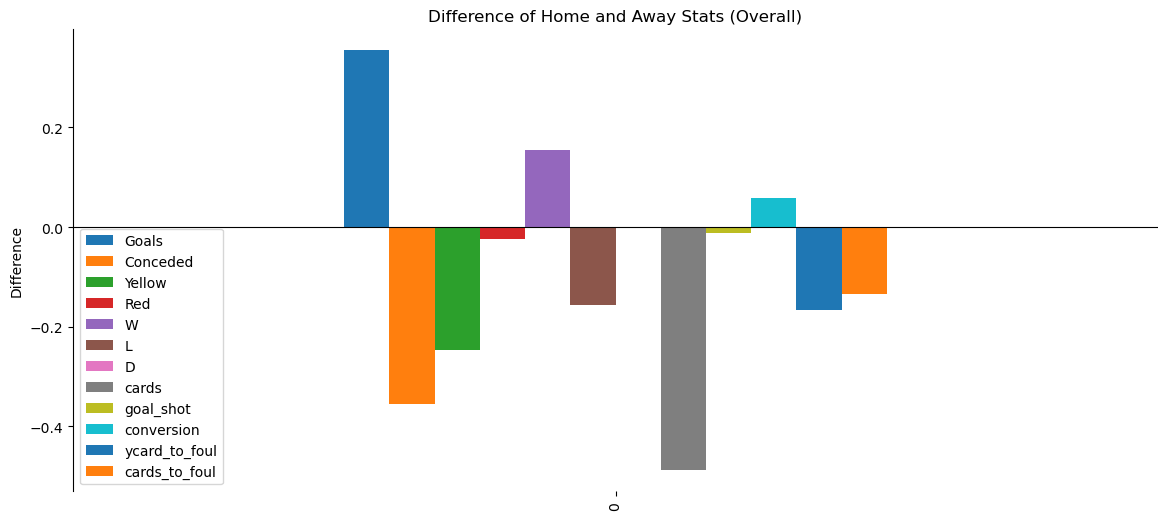

In [44]:
# PLOTS 
fig, ax = plt.subplots(figsize=(14, 6))

a.plot(kind="bar", ax=ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_title("Difference of Home and Away Stats (Overall)")
ax.set_xlabel("")
ax.set_ylabel("Difference")
ax.axhline(0, color='black', linewidth=0.8)

Text(0.5, 1.0, 'Difference of Home and Away Stats (By Team Category)')

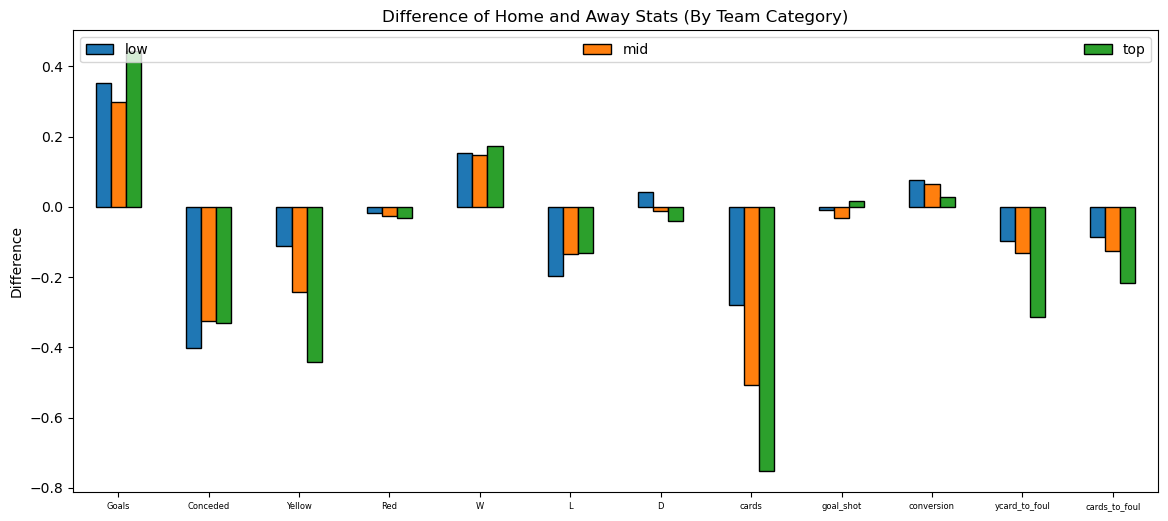

In [45]:
fig, ax = plt.subplots(figsize=(14, 6))

avg_team_diff.T.plot(kind="bar", ax=ax, edgecolor="k", rot=0)
ax.legend(mode="expand", ncol=5)
ax.set_xticklabels(avg_team_diff.columns, fontsize=6)
ax.set_ylabel("Difference")
ax.set_title("Difference of Home and Away Stats (By Team Category)")


Text(0.5, 1.0, 'Difference of Home and Away Stats (By Season)')

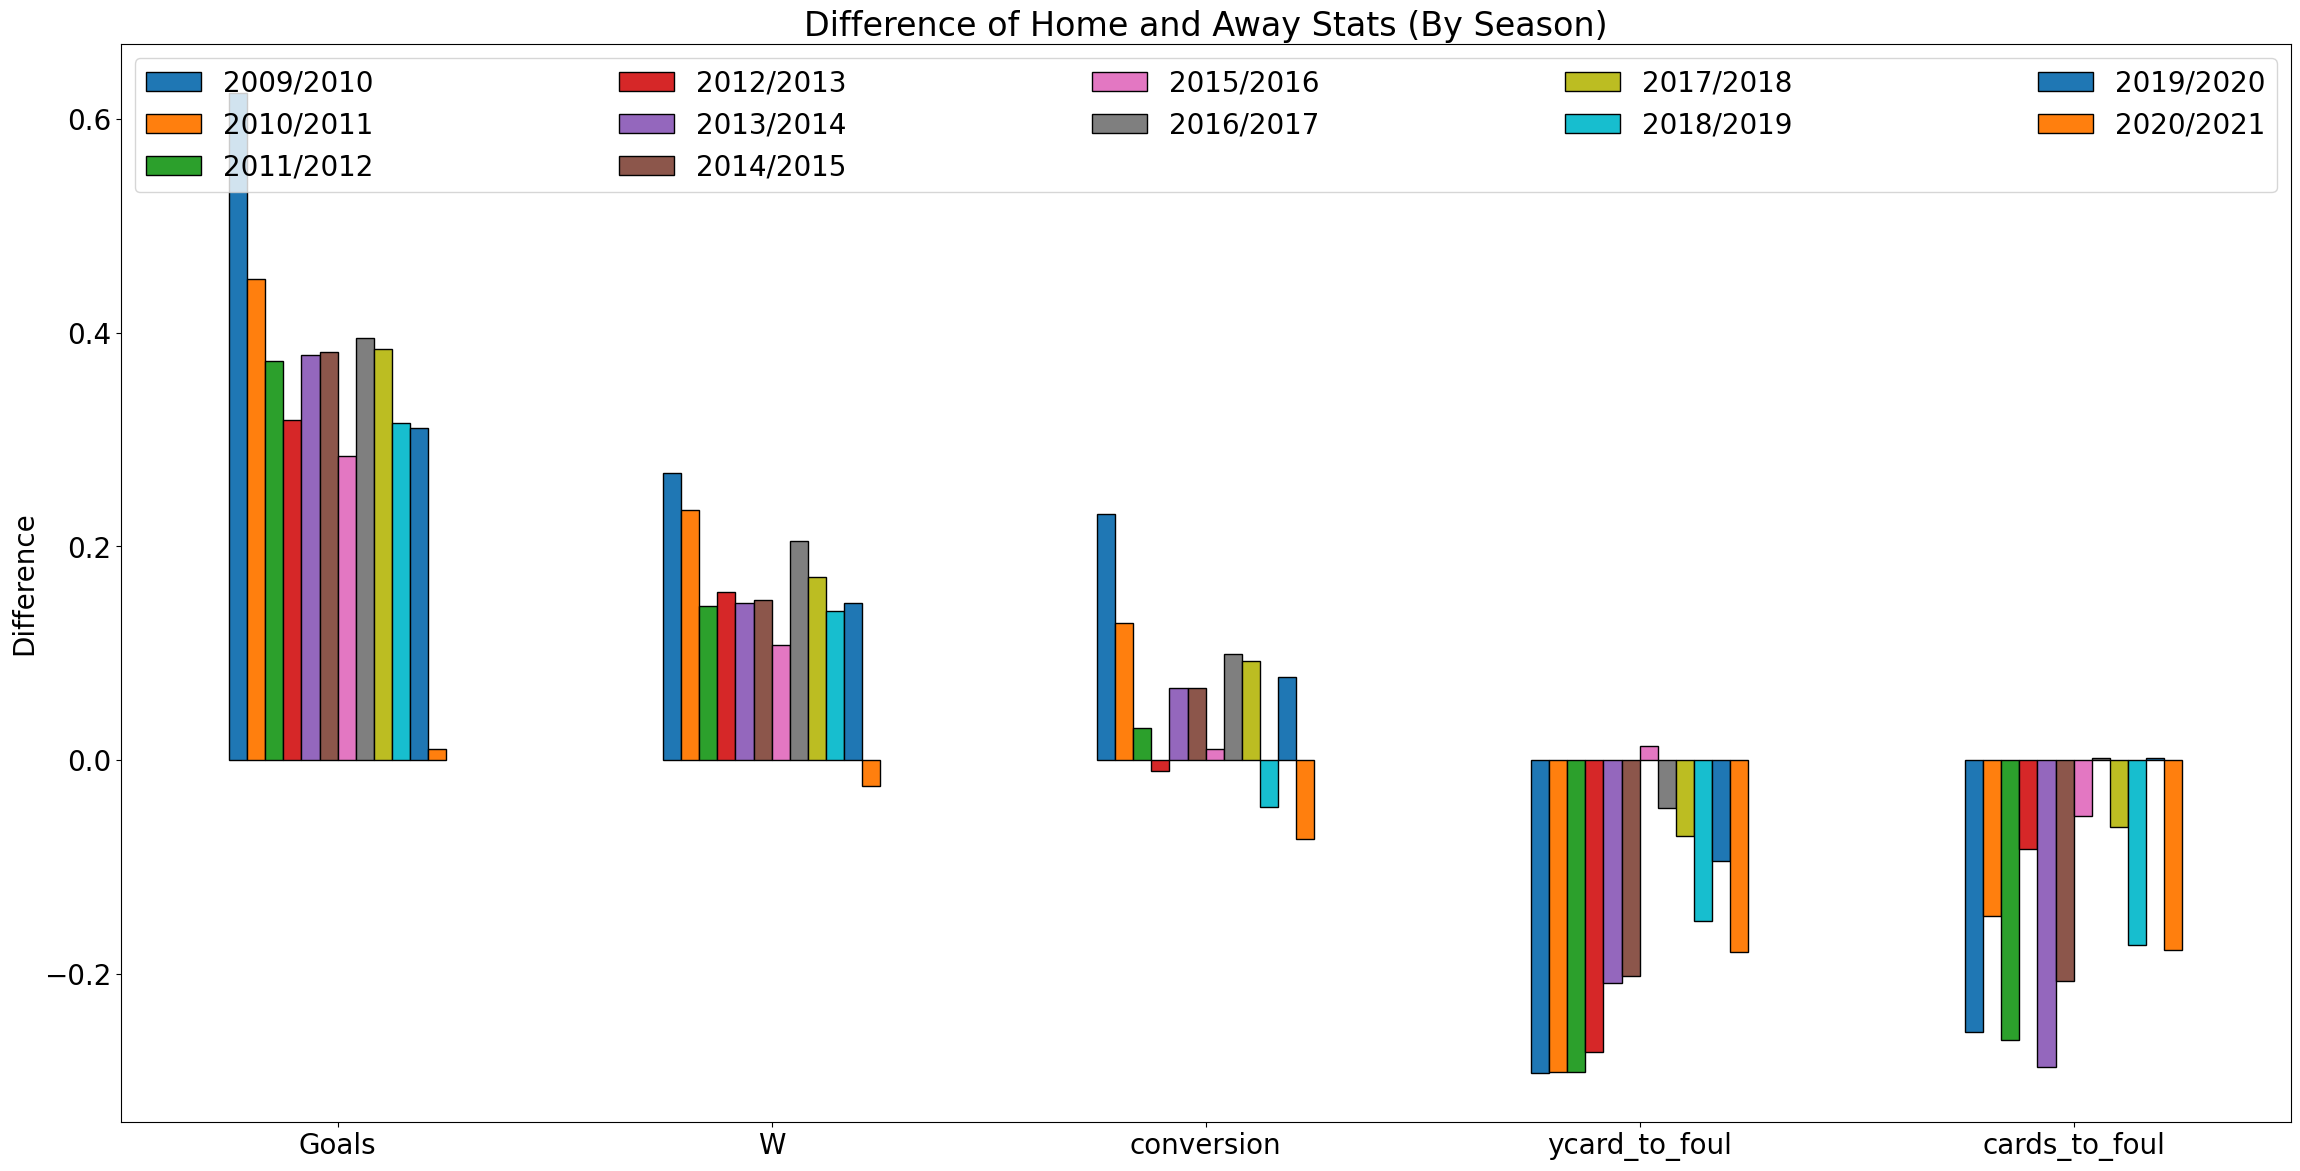

In [46]:
plt.rcParams.update({'font.size': 20})

fig, ax = plt.subplots(figsize=(28, 14))

avg_season[['Goals', 'W', 'conversion','ycard_to_foul', 'cards_to_foul']].T.plot(kind="bar", ax=ax, edgecolor="k", rot=0)
ax.legend(mode="expand", ncol=5)
ax.set_xticklabels(['Goals', 'W', 'conversion','ycard_to_foul', 'cards_to_foul'])
ax.set_ylabel("Difference")
ax.set_title("Difference of Home and Away Stats (By Season)")


Linear Regression Model for contribution to home advantage (winning at home).

Y - Win % at home
X1 - Goals Scored at Home
X2 - Goals Conceded at Home
Conversion - Goals converted per shot taken
yellow cards to fouls 
cards to fouls 
Attendance


controls:
category of team



In [47]:
gbsth = combined_df.groupby(['Season', 'cat', 'Team', 'HomeAway']).mean().reset_index()
gbsth = gbsth[gbsth['HomeAway'] == 1]
gbsth = gbsth.drop('HomeAway', axis=1)
gbsth = gbsth.sort_values(by=['Season', 'Team'])

In [48]:
conditions = [(gbsth['cat'] == 'top'), 
              (gbsth['cat'] == 'mid'),
              (gbsth['cat'] == 'low')]

values = [1, 0, 0]

gbsth['top'] = np.select(conditions, values)

conditions = [(gbsth['cat'] == 'top'), 
              (gbsth['cat'] == 'mid'),
              (gbsth['cat'] == 'low')]

values = [0, 1, 0]

gbsth['mid'] = np.select(conditions, values)

conditions = [(gbsth['cat'] == 'top'), 
              (gbsth['cat'] == 'mid'),
              (gbsth['cat'] == 'low')]

values = [0, 0, 1]

gbsth['low'] = np.select(conditions, values)

In [49]:
att = att[att['Attendance'] != 0]
att = att.sort_values(by=['Season', 'team'])
att = att.rename(columns={'team': 'Team'})

In [50]:
reg = pd.merge(gbsth, att, on=['Season', 'Team'])
reg

,Season,cat,Team,Goals,Conceded,Yellow,Red,W,L,D,cards,goal_shot,conversion,ycard_to_foul,cards_to_foul,top,mid,low,Attendance
0,2009/2010,low,Arsenal FC,2.526316,0.789474,1.263158,0.052632,0.789474,0.105263,0.105263,1.789474,1.092849,0.355296,-0.258618,-0.072651,0,0,1,59927.00000
1,2009/2010,mid,Aston Villa,1.526316,0.842105,1.210526,0.000000,0.421053,0.157895,0.421053,1.210526,0.652208,0.166885,-0.488984,-0.414932,0,1,0,38573.42105
2,2009/2010,low,Bolton,1.368421,1.631579,1.789474,0.105263,0.315789,0.368421,0.315789,2.842105,0.888761,0.005861,-0.006797,0.097321,0,0,1,21880.89474
3,2009/2010,mid,Burnley,1.315789,1.578947,1.052632,0.000000,0.368421,0.368421,0.263158,1.052632,0.620217,0.071290,-0.512019,-0.424117,0,1,0,20653.84211
4,2009/2010,top,Chelsea,3.578947,0.736842,0.894737,0.105263,0.894737,0.052632,0.052632,1.947368,0.951528,0.622860,-0.691637,-0.328784,1,0,0,41422.57895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,2020/2021,low,Southampton,1.473684,1.315789,1.210526,0.052632,0.421053,0.421053,0.157895,1.736842,0.089623,0.175174,-0.417638,-0.191707,0,0,1,526.00000
229,2020/2021,top,Tottenham,1.842105,1.052632,1.263158,0.052632,0.526316,0.315789,0.157895,1.789474,0.163085,0.536882,-0.389431,-0.258371,1,0,0,632.00000
230,2020/2021,mid,West Brom,0.789474,2.052632,1.368421,0.105263,0.157895,0.526316,0.315789,2.421053,-0.192834,-0.232669,-0.174265,0.011069,0,1,0,276.00000
231,2020/2021,mid,West Ham,1.684211,1.157895,1.263158,0.052632,0.526316,0.263158,0.210526,1.789474,-0.024220,0.650316,-0.271134,-0.133292,0,1,0,632.00000


In [51]:
reg["Attendance"] = (reg["Attendance"] - reg["Attendance"].mean()) / reg["Attendance"].std()

In [52]:
xs = ['Goals', 'Conceded', 'conversion', 'ycard_to_foul', 'cards_to_foul', 'Attendance']

In [53]:
import matplotlib.colors as mplc
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm

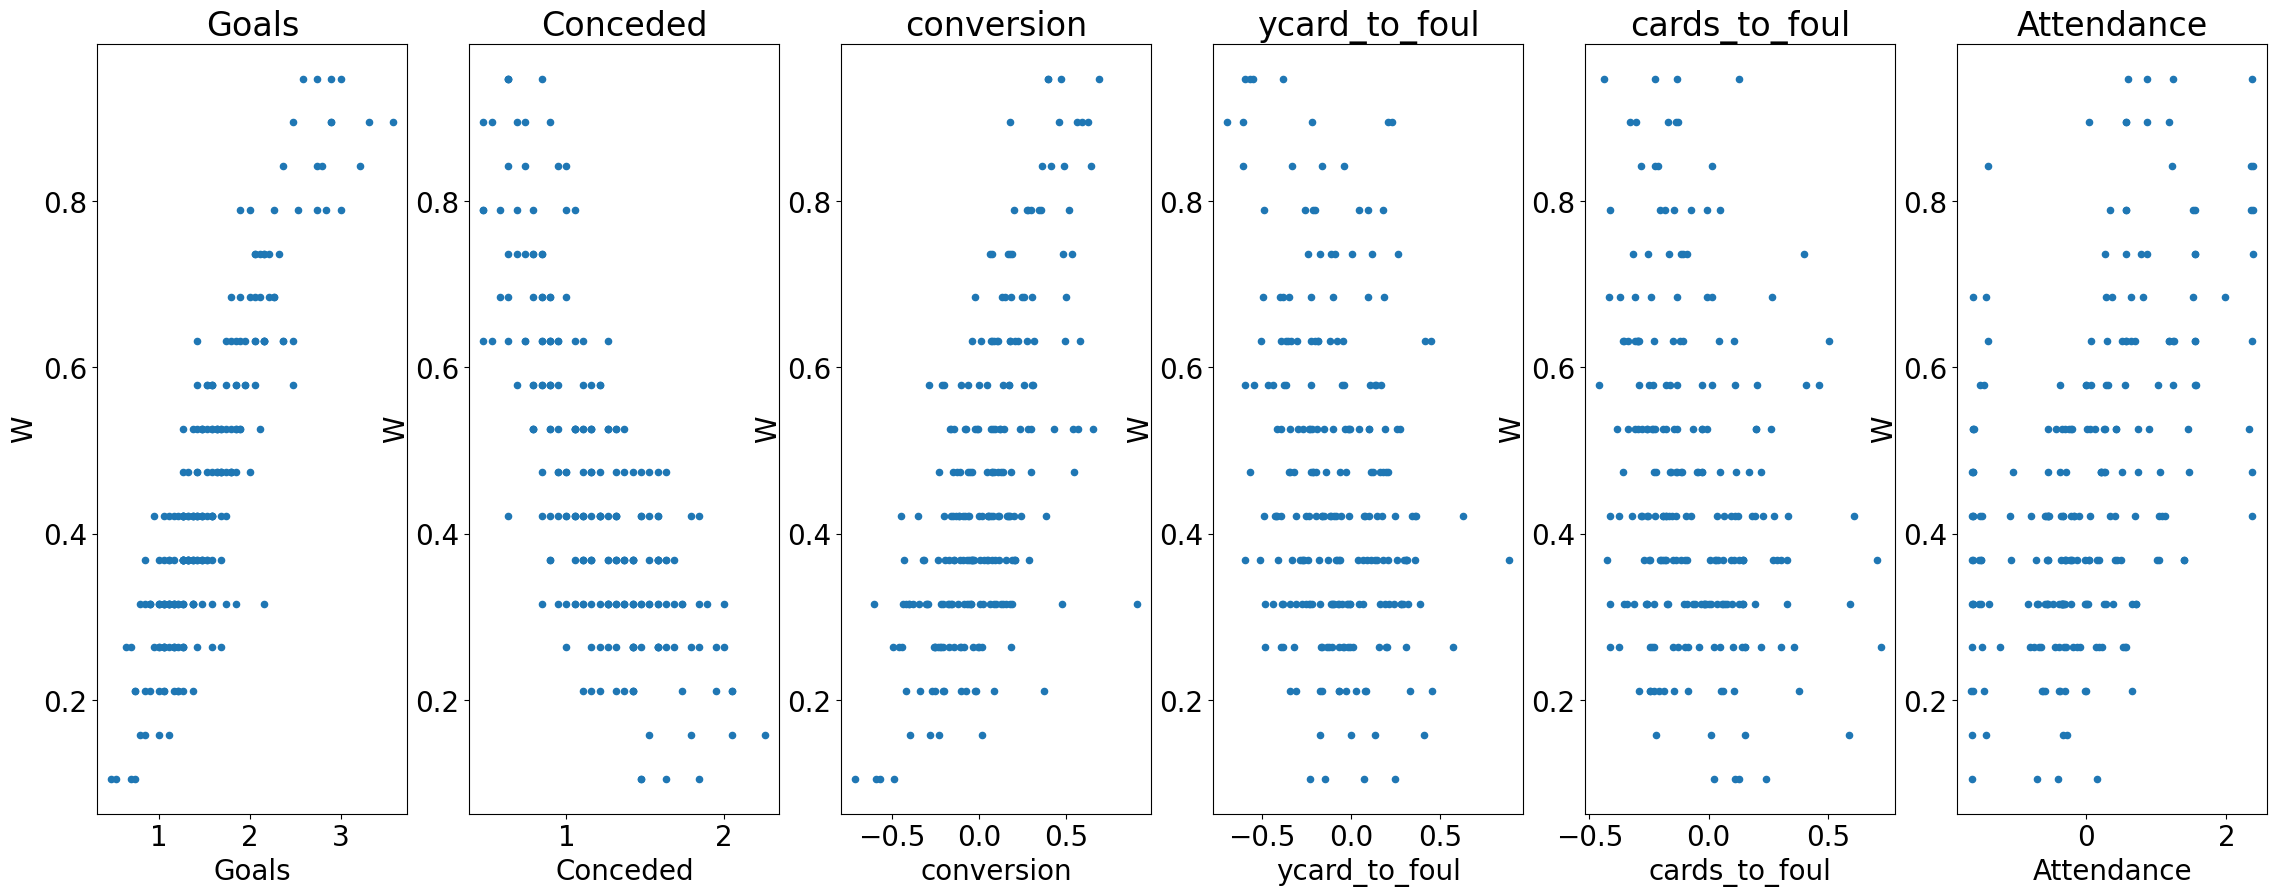

In [54]:
def single_scatter_plot(df, x, ax):
    
    # Filter data to keep only the data of interest
    
    df.plot(
        kind="scatter", x=x, y="W", ax=ax
    )

    return ax

# Create initial plot
fig, ax = plt.subplots(1, 6, figsize=(28, 10))

for i in range(len(xs)):
    single_scatter_plot(reg, xs[i], ax[i])
    ax[i].set_title(xs[i])

In [55]:
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from linearmodels.iv import IV2SLS

In [56]:
# Add constant term to dataset
reg['const'] = 1

# Create lists of variables to be used in each regression
X1 = ['const', 'Attendance']
X2 = ['const', 'Goals']
X3 = ['const', 'Goals', 'Attendance']
X4 = ['const', 'Goals', 'Attendance', 'Conceded', 'conversion']
X5 = ['const', 'Attendance', 'cards_to_foul']
X6 = ['const', 'Goals', 'Attendance', 'Conceded', 'cards_to_foul']

# Estimate an OLS regression for each set of variables
reg1 = sm.OLS(reg['W'], reg[X1], missing='drop').fit()
reg2 = sm.OLS(reg['W'], reg[X2], missing='drop').fit()
reg3 = sm.OLS(reg['W'], reg[X3], missing='drop').fit()
reg4 = sm.OLS(reg['W'], reg[X4], missing='drop').fit()
reg5 = sm.OLS(reg['W'], reg[X5], missing='drop').fit()
reg6 = sm.OLS(reg['W'], reg[X6], missing='drop').fit()

In [57]:
from statsmodels.iolib.summary2 import summary_col
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}", 
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

In [58]:
results_table = summary_col(results=[reg1,reg2,reg3, reg4, reg5, reg6],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 1',
                                         'Model 2',
                                         'Model 3',
                                         'Model 4',
                                         'Model 5',
                                         'Model 6'],
                            info_dict=info_dict,
                            regressor_order=['const',
                                             'Attendance',
                                             'Goals',
                                             'Conceded',
                                             'conversion',
                                             'ycard_to_foul',
                                             'cards_to_foul'])

#results_table.add_title('Table 2 - OLS Regressions')

print(results_table)


                 Model 1 Model 2 Model 3 Model 4  Model 5  Model 6 
-------------------------------------------------------------------
const            0.46*** -0.02   0.01    0.34***  0.44***  0.31*** 
                 (0.01)  (0.02)  (0.02)  (0.03)   (0.01)   (0.03)  
Attendance       0.09***         0.03*** 0.01**   0.09***  0.01*   
                 (0.01)          (0.01)  (0.00)   (0.01)   (0.01)  
Goals                    0.31*** 0.29*** 0.22***           0.23*** 
                         (0.01)  (0.01)  (0.01)            (0.01)  
Conceded                                 -0.18***          -0.18***
                                         (0.01)            (0.02)  
conversion                               0.04*                     
                                         (0.02)                    
cards_to_foul                                     -0.20*** 0.01    
                                                  (0.05)   (0.02)  
R-squared        0.25    0.79    0.81    0.88  

In [59]:
X4 = ['const', 'Goals', 'Attendance', 'Conceded', 'conversion', 'top', 'mid', 'low']
X5 = ['const', 'Attendance', 'cards_to_foul', 'top', 'mid', 'low']
X6 = ['const', 'Goals', 'Attendance', 'Conceded', 'cards_to_foul', 'top', 'mid', 'low']

In [60]:
reg4 = sm.OLS(reg['W'], reg[X4], missing='drop').fit()
reg5 = sm.OLS(reg['W'], reg[X5], missing='drop').fit()
reg6 = sm.OLS(reg['W'], reg[X6], missing='drop').fit()

In [61]:
from statsmodels.iolib.summary2 import summary_col
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}", 
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

In [62]:
results_table1 = summary_col(results=[reg4, reg5, reg6],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 4',
                                         'Model 5',
                                         'Model 6'],
                            info_dict=info_dict,
                            regressor_order=['const',
                                             'Attendance',
                                             'Goals',
                                             'Conceded',
                                             'conversion',
                                             'ycard_to_foul',
                                             'cards_to_foul',
                                             'top',
                                             'mid',
                                             'low'])

#results_table.add_title('Table 2 - OLS Regressions')

print(results_table1)


                 Model 4  Model 5  Model 6 
-------------------------------------------
const            0.26***  0.35***  0.24*** 
                 (0.03)   (0.01)   (0.02)  
Attendance       0.01**   0.05***  0.01*   
                 (0.00)   (0.01)   (0.01)  
Goals            0.20***           0.23*** 
                 (0.02)            (0.01)  
Conceded         -0.18***          -0.18***
                 (0.02)            (0.02)  
conversion       0.05**                    
                 (0.02)                    
cards_to_foul             -0.11*** 0.01    
                          (0.04)   (0.02)  
top              0.10***  0.26***  0.09*** 
                 (0.01)   (0.02)   (0.01)  
mid              0.08***  0.04***  0.07*** 
                 (0.01)   (0.01)   (0.01)  
low              0.08***  0.05***  0.07*** 
                 (0.01)   (0.01)   (0.01)  
R-squared        0.88     0.51     0.88    
R-squared Adj.   0.88     0.50     0.88    
R-squared        0.88     0.51 

Effect of crowds -



In [63]:
pre_covid = reg[reg['Season'] != '2020/2021']
covid = reg[reg['Season'] == '2020/2021']

In [64]:
reg4a = sm.OLS(pre_covid['W'], pre_covid[X4], missing='drop').fit()
reg5a = sm.OLS(pre_covid['W'], pre_covid[X5], missing='drop').fit()
reg6a = sm.OLS(pre_covid['W'], pre_covid[X6], missing='drop').fit()
reg4b = sm.OLS(covid['W'], covid[X4], missing='drop').fit()
reg5b = sm.OLS(covid['W'], covid[X5], missing='drop').fit()
reg6b = sm.OLS(covid['W'], covid[X6], missing='drop').fit()

In [65]:
from statsmodels.iolib.summary2 import summary_col
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}", 
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

In [66]:
results_table1 = summary_col(results=[reg4a, reg4b, reg5a, reg5b, reg6a, reg6b],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 1(pre)',
                                         'Model 1(covid)',
                                         'Model 2(pre)',
                                         'Model 2(covid)',
                                         'Model 3(pre)',
                                         'Model 3(covid)',],
                            info_dict=info_dict,
                            regressor_order=['const',
                                             'Attendance',
                                             'Goals',
                                             'Conceded',
                                             'conversion',
                                             'ycard_to_foul',
                                             'cards_to_foul',
                                             'top',
                                             'mid',
                                             'low'])

#results_table.add_title('Table 2 - OLS Regressions')

print(results_table1)


                 Model 1(pre) Model 1(covid) Model 2(pre) Model 2(covid) Model 3(pre) Model 3(covid)
----------------------------------------------------------------------------------------------------
const            0.26***      0.13           0.35***      9.63**         0.24***      1.76          
                 (0.03)       (2.66)         (0.01)       (3.51)         (0.02)       (2.54)        
Attendance       0.01*        -0.07          0.05***      7.74**         0.01*        1.33          
                 (0.01)       (2.20)         (0.01)       (2.90)         (0.01)       (2.09)        
Goals            0.21***      0.20***                                    0.23***      0.22***       
                 (0.02)       (0.05)                                     (0.01)       (0.04)        
Conceded         -0.18***     -0.13**                                    -0.18***     -0.10         
                 (0.02)       (0.06)                                     (0.02)       (0.0